In [1]:
from ISR.models import RRDN
from ISR.models import Discriminator
from ISR.models import Cut_VGG19

In [21]:
lr_train_patch_size = (200, 300)
layers_to_extract = [5, 9]
scale = 2
hr_train_patch_size = lr_train_patch_size * scale

rrdn  = RRDN(arch_params={'C':4, 'D':3, 'G':64, 'G0':64, 'T':10, 'x':scale}, patch_size=lr_train_patch_size)
f_ext = Cut_VGG19(patch_size=hr_train_patch_size, layers_to_extract=layers_to_extract)
discr = Discriminator(patch_size=hr_train_patch_size, kernel_size=3)

TypeError: Error converting shape to a TensorShape: int() argument must be a string, a bytes-like object or a number, not 'tuple'.

In [5]:
from ISR.models import RDN

In [14]:
rrdn = RDN(arch_params={'C': 3, 'D':10, 'G':64, 'G0':64, 'x':2})

In [20]:
rrdn.model.summary()

Model: "generator"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
LR_input (InputLayer)           [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
Pre_blocks_conv (Conv2D)        (None, 200, 200, 64) 1792        LR_input[0][0]                   
__________________________________________________________________________________________________
F_1_1_1 (Conv2D)                (None, 200, 200, 64) 36928       Pre_blocks_conv[0][0]            
__________________________________________________________________________________________________
F_1_1_1_Relu (Activation)       (None, 200, 200, 64) 0           F_1_1_1[0][0]                    
__________________________________________________________________________________________

In [27]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
fashion_mnist = tf.keras.datasets.mnist.load_data()

In [28]:
cifar100 = tf.keras.datasets.cifar100.load_data()
(train_image, train_label), (test_image, test_label) = cifar100

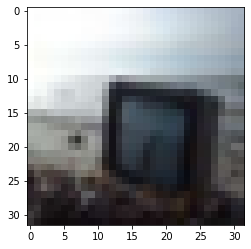

In [29]:
plt.imshow(train_image[52])

In [34]:
from ISR.utils import image_processing as im

In [44]:
a = im.split_image_into_overlapping_patches(train_image, 32, 24)

ValueError: too many values to unpack (expected 3)

In [40]:
train_image[52].shape

(32, 32, 3)

In [48]:
im.process_array(train_image).shape

(1, 50000, 32, 32, 3)

TypeError: Invalid shape (1, 80, 80, 3) for image data

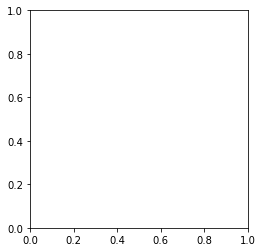

In [39]:
plt.imshow(a[0])

In [55]:
b=im.pad_patch(train_image[52], 10, 3)

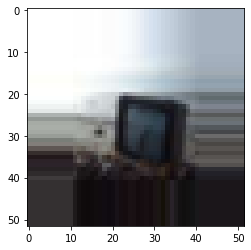

In [57]:
b.shape
plt.imshow(b)

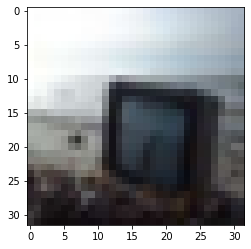

In [52]:
plt.imshow(train_image[52])

In [62]:
c = im.split_image_into_overlapping_patches(b, 32, 10)
len(c)

2

In [65]:
c[1]

(84, 84, 3)

In [69]:
img_raw = tf.io.read_file("section8-image.png")
img_tensor = tf.image.decode_image(img_raw)

In [70]:
print(img_tensor)

tf.Tensor(
[[[ 31  62   6]
  [ 31  58   6]
  [ 32  59   6]
  ...
  [ 19  14   6]
  [ 19  14   6]
  [ 21  13   6]]

 [[ 31  64   6]
  [ 25  60   6]
  [ 34  66   6]
  ...
  [ 12  10   6]
  [ 15  11   6]
  [ 21  14   6]]

 [[ 33  64   6]
  [ 36  64  10]
  [ 45  73  16]
  ...
  [ 15  11   6]
  [ 16  12   6]
  [ 24  15   6]]

 ...

 [[243  82  63]
  [196  70  30]
  [100  29  10]
  ...
  [ 27  33   6]
  [ 31  31   6]
  [ 39  34   6]]

 [[236  62  53]
  [227  78  44]
  [136  40   6]
  ...
  [ 24  35   6]
  [ 26  35   6]
  [ 31  32   6]]

 [[195  34  26]
  [231  62  48]
  [204  70  29]
  ...
  [ 24  36   6]
  [ 26  36   6]
  [ 29  36   6]]], shape=(256, 256, 3), dtype=uint8)


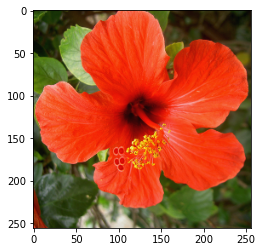

In [71]:
plt.imshow(img_tensor)